In this analysis I investigate the factors (such as income, education, merital status, response to campaign, complaint status) affecting total amount spent and total number of purchases in a superstore. I also investigate various spending categories and their share in total amount spent.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('SuperStore-Data.csv')

In [ ]:
# Generating Descriptive Statistics
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2238.000000,2238.000000,2214.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000
mean,5591.962913,1968.802055,52250.697832,0.444593,0.505809,49.150581,303.919571,26.323056,167.054513,37.555407,27.084450,44.023682,2.322609,4.082216,2.663539,5.789991,5.314120,0.148794,0.009383
std,3244.208285,11.988769,25184.187770,0.538475,0.544581,28.942548,336.747394,39.785104,225.789149,54.644192,41.292674,52.190719,1.931444,2.778588,2.923984,3.252405,2.426402,0.355964,0.096434
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2829.500000,1959.000000,35265.000000,0.000000,0.000000,24.000000,23.250000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51400.500000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8425.250000,1977.000000,68592.000000,1.000000,1.000000,74.000000,504.750000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


Income has missing values (n=2214). While the other variables dont have any missing values (i.e. n=2238).

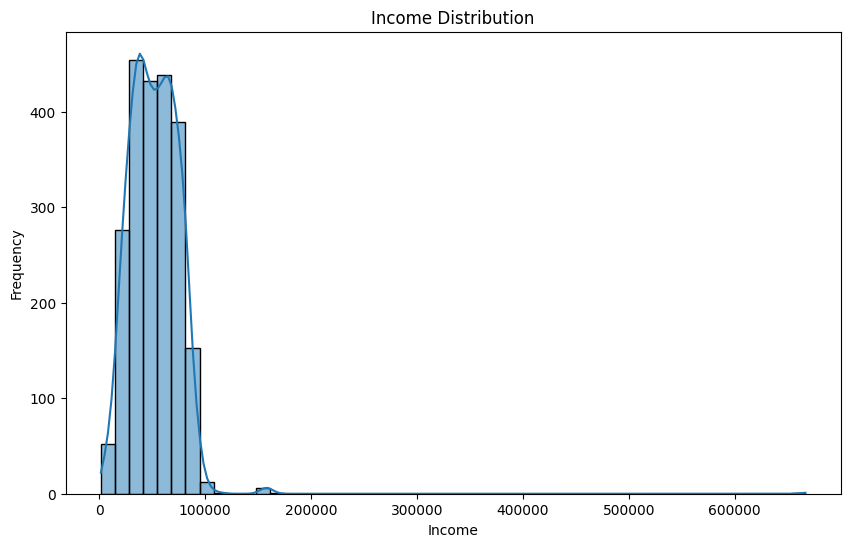

In [ ]:
# Generating Histogram of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=50, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

Income has one outlier on the right tail with a value of 666,666, This oulier skews the distribution of income. Next we eliminate outliers from income below.

In [ ]:
# Eliminating the Outliers in Income Distribution
def replace_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median = series.median()
    return series.apply(lambda x: median if x < lower or x > upper else x)

df['Income'] = replace_outliers(df['Income'])

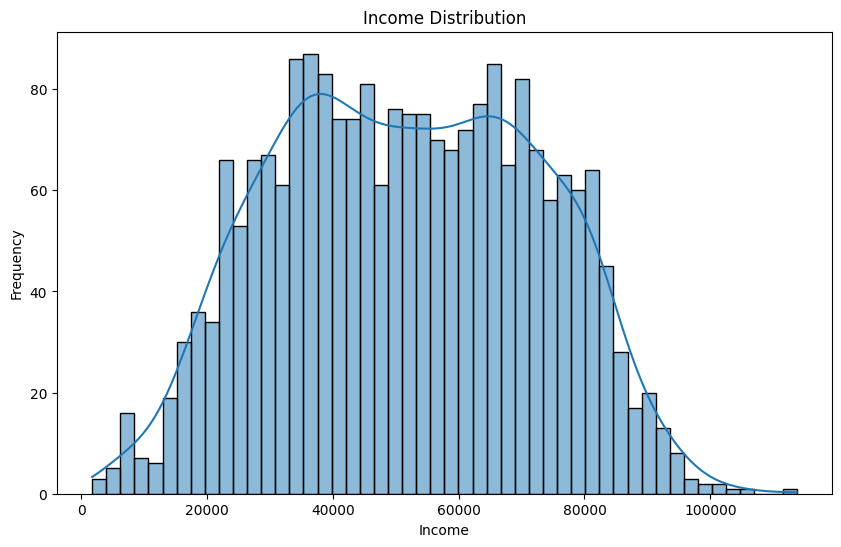

In [ ]:
# Histogram of Income After Eliminating Outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=50, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

In [ ]:
# Descriptive Stats for Income After Eliminating Outliers
df['Income'].describe()

,Income
count,2238.000000
mean,51635.687895
std,20573.797958
min,1730.000000
25%,35528.250000
50%,51523.500000
75%,68110.750000
max,113734.000000


In [ ]:
# Finding the number of missing values in the Data
df.isna().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


There are 24 observations with missing income values. Next we replace the missing income values with mean income.

In [ ]:
# Replacing the missing Income values with the mean
mean_income = df['Income'].mean()
df['Income'].fillna(mean_income, inplace=True)

<ipython-input-6-5deffaf467a3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(mean_income, inplace=True)


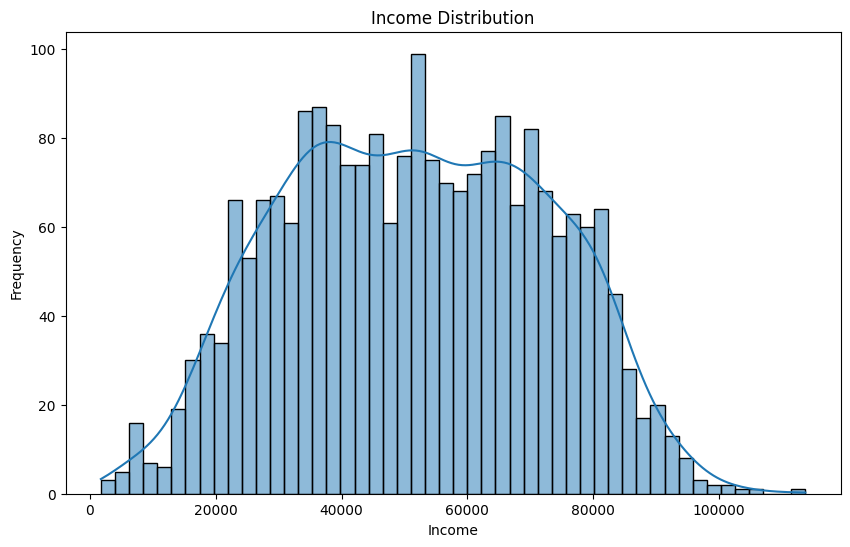

In [ ]:
# Histogram of Income After Imputing Missing Values
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=50, kde=True)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Income Distribution')
plt.show()

In [ ]:
# Calculation of Total Amount Spent on Products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']


We add the amount spent on wines, fruits, meat products, fish products, sweet products and gold products to find total amount spent.

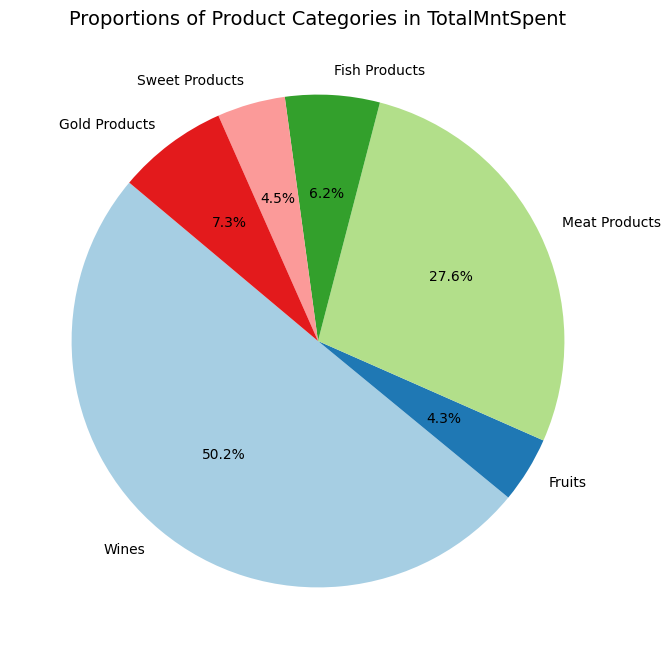

In [ ]:
# Pie Chart for Total Amount Spent on Products
# Calculation of the total sum for each product category
category_totals = {
        'Wines': df['MntWines'].sum(),
        'Fruits': df['MntFruits'].sum(),
        'Meat Products': df['MntMeatProducts'].sum(),
        'Fish Products': df['MntFishProducts'].sum(),
        'Sweet Products': df['MntSweetProducts'].sum(),
        'Gold Products': df['MntGoldProds'].sum(),
}
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
category_totals.values(),
labels=category_totals.keys(),
autopct='%1.1f%%',
startangle=140,
colors=plt.cm.Paired.colors
)
plt.title('Proportions of Product Categories in TotalMntSpent', fontsize=14)
plt.show()

In [ ]:
Largest amount is spent on wines followed by meat products.

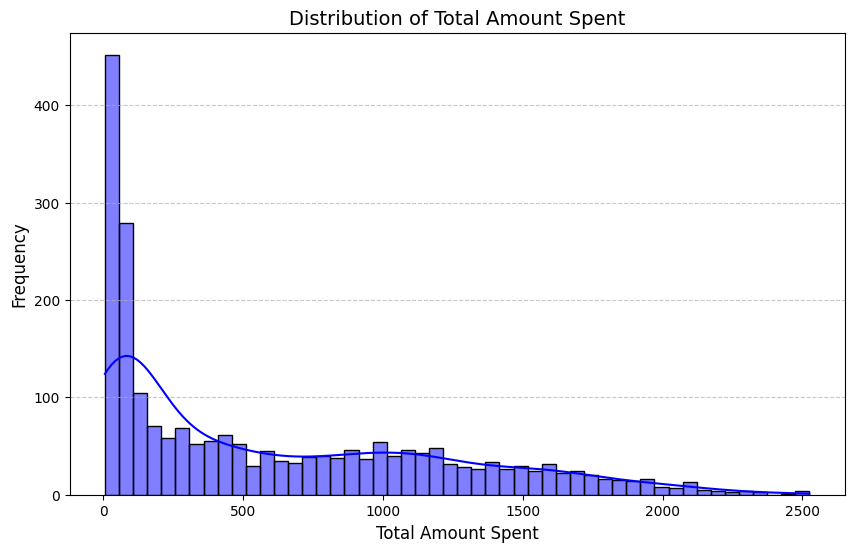

In [ ]:
# Distribution of Total Amount Spent
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalMntSpent'], kde=True, color='blue', bins=50)
plt.title('Distribution of Total Amount Spent', fontsize=14)
plt.xlabel('Total Amount Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The highest frequency og total amount spent is observed for smaller values and as the values get larger frequency declines.

In [ ]:
# Descriptive Stats for TotalMntSpent
df['TotalMntSpent'].describe()

,TotalMntSpent
count,2238.000000
mean,605.960679
std,602.493906
min,5.000000
25%,68.250000
50%,396.000000
75%,1046.500000
max,2525.000000


In [ ]:
# Calculation of Total Number of Purchases
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

We add number of web purchases, catalog purchases, store purchases and deals purchases to find total number of purchases.

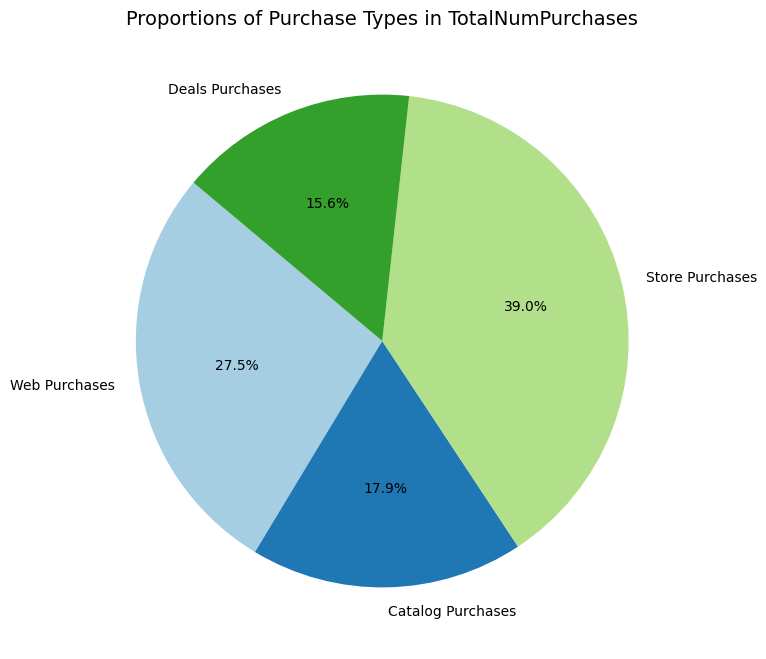

In [ ]:
# Pie Chart for Total Number of Purchases
# Calculation of the total number of purchases for each category
purchase_totals = {
        'Web Purchases': df['NumWebPurchases'].sum(),
        'Catalog Purchases': df['NumCatalogPurchases'].sum(),
        'Store Purchases': df['NumStorePurchases'].sum(),
        'Deals Purchases': df['NumDealsPurchases'].sum(),
}
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
        purchase_totals.values(),
        labels=purchase_totals.keys(),
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
)
plt.title('Proportions of Purchase Types in TotalNumPurchases', fontsize=14)
plt.show()

In [ ]:
The largest number of purchases is observed for store purchases followed by web purchases.

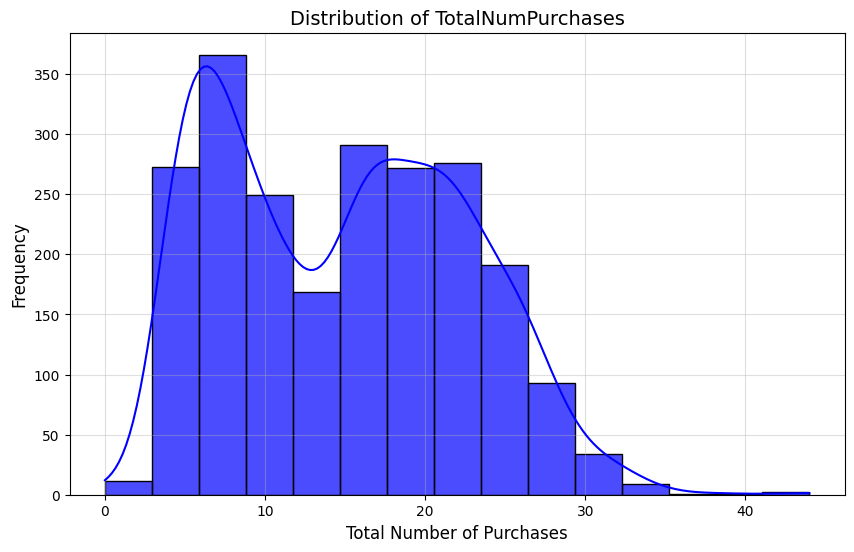

In [ ]:
# Histogram of Total Number of Purchases
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalNumPurchases'], bins=15, kde=True, color='blue', alpha=0.7)
plt.title('Distribution of TotalNumPurchases', fontsize=14)
plt.xlabel('Total Number of Purchases', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

In [ ]:
# Descriptive Stats for TotalNumPurchases
df['TotalNumPurchases'].describe()

,TotalNumPurchases
count,2238.000000
mean,14.858356
std,7.679606
min,0.000000
25%,8.000000
50%,15.000000
75%,21.000000
max,44.000000


In [ ]:
# Calculation of Total Children Living in the Household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

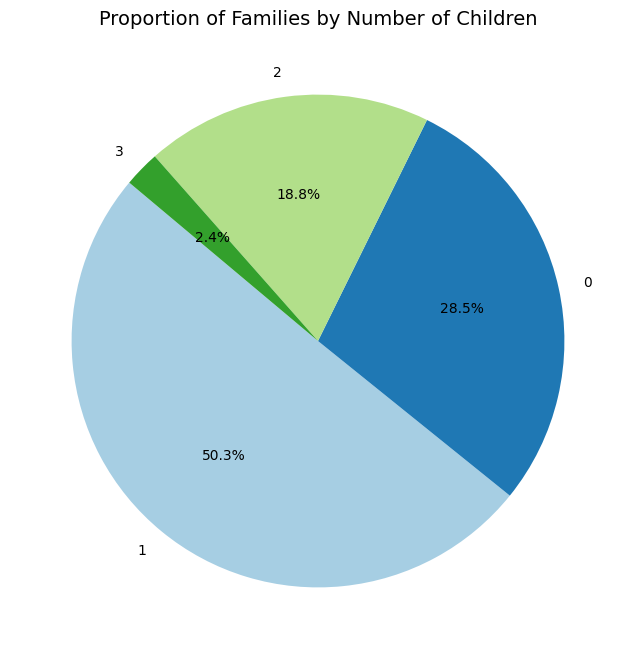

In [ ]:
# Pie Chart for Distribution of Children
# Count the occurrences of each value in the 'Children' column
children_counts = df['Children'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
        children_counts,
        labels=children_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
)
plt.title('Proportion of Families by Number of Children', fontsize=14)
plt.show()

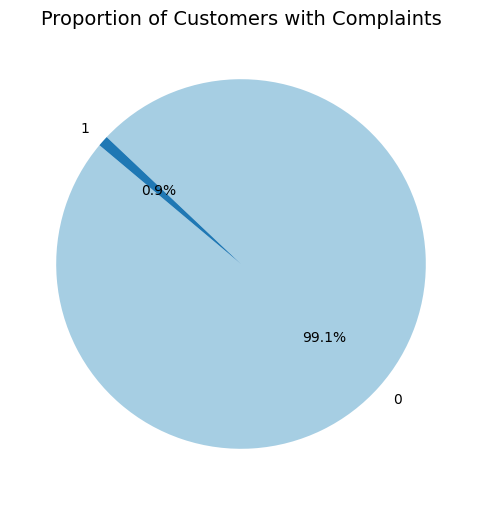

In [ ]:
# Pie Chart for Proportion of Customers with Complaints
# Count the occurrences of each value in the 'Complain' column
complain_counts = df['Complain'].value_counts()
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    complain_counts,
    labels=complain_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Proportion of Customers with Complaints', fontsize=14)
plt.show()

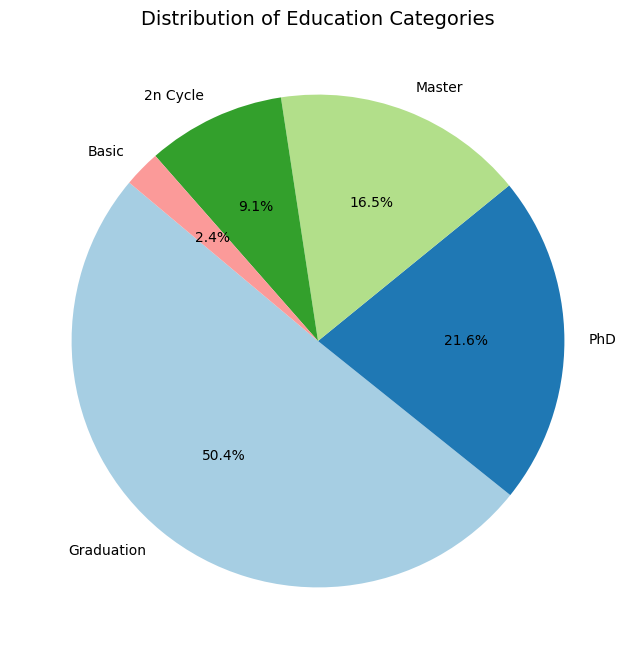

In [ ]:
# Pie Chart for Education Categories
# Count the occurrences of each education category
education_counts = df['Education'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    education_counts,
    labels=education_counts.index,
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=140,  # Rotate the start angle of the chart
    colors=plt.cm.Paired.colors  # Use a colormap for the slices
)
plt.title('Distribution of Education Categories', fontsize=14)  # Add a title
plt.show()  # Display the chart

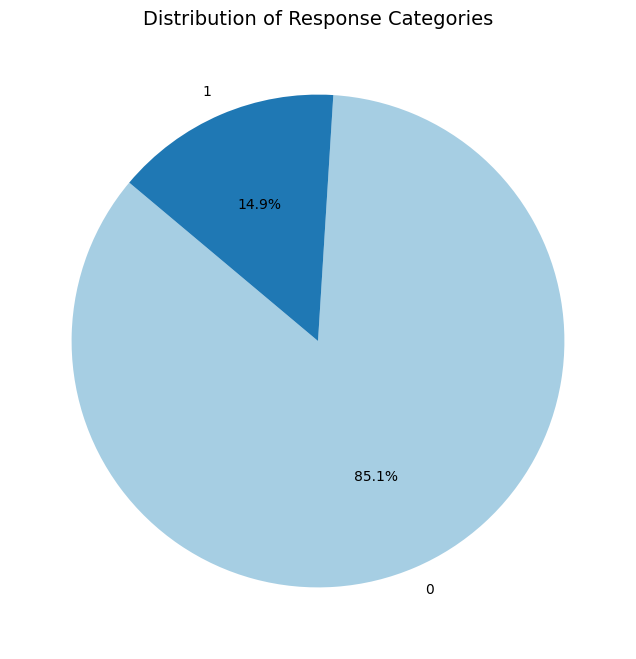

In [ ]:
# Pie Chart for Response Categories
# Count the occurrences of each education category
education_counts = df['Response'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    education_counts,
    labels=education_counts.index,
    autopct='%1.1f%%',  # Display percentages with one decimal place
    startangle=140,  # Rotate the start angle of the chart
    colors=plt.cm.Paired.colors  # Use a colormap for the slices
)
plt.title('Distribution of Response Categories', fontsize=14)  # Add a title
plt.show()  # Display the chart

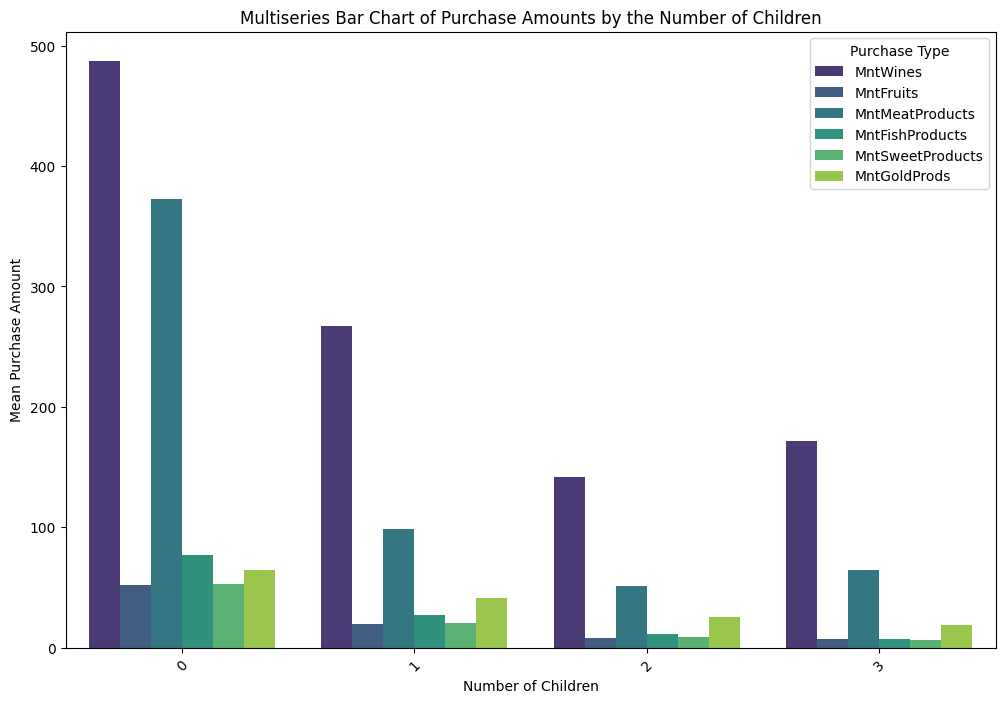

In [ ]:
# The relationship between the number of children and various purchase categories
# Create a new DataFrame with columns for the number of Children and the purchase amounts
purchase_df = df[['Children', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Group the data by the number of Children and calculate the mean purchase amounts for number of children
purchase_grouped = purchase_df.groupby('Children').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Children', var_name='PurchaseAmountType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Children', y='mean', hue='PurchaseAmountType', palette='viridis')

# Add labels and title
plt.xlabel('Number of Children')
plt.ylabel('Mean Purchase Amount')
plt.title('Multiseries Bar Chart of Purchase Amounts by the Number of Children')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The above bar charts shows that the largest amount of spending is made by families with no children and the largest category of purchases is wine purchases regardless of the number of children.

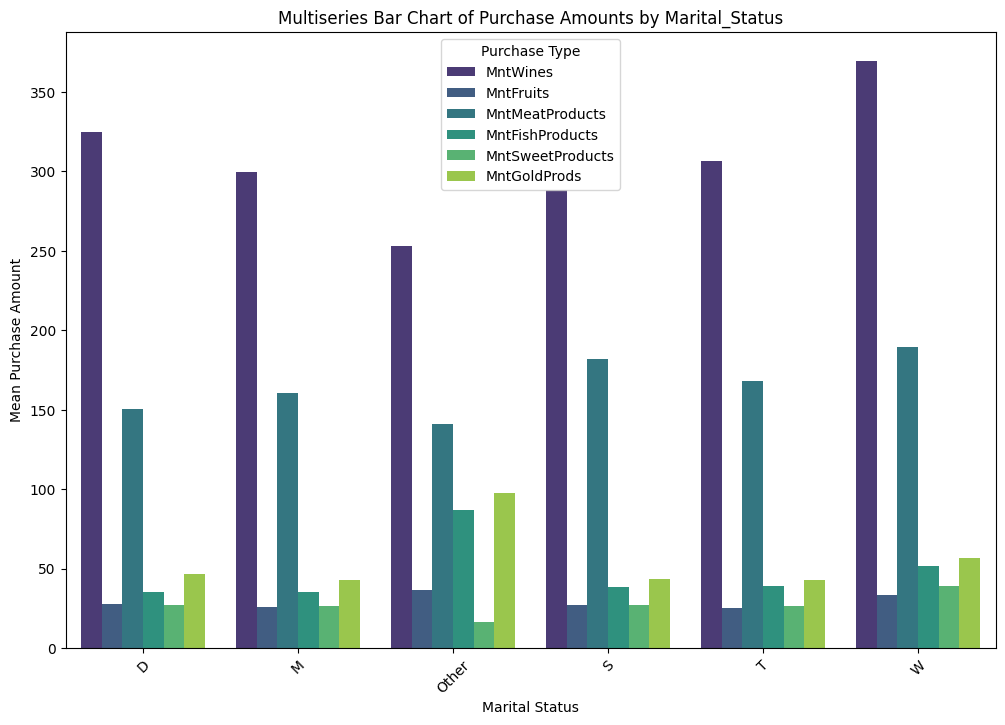

In [ ]:
# The relationship between Marital Status and various purchase categories
# Create a new DataFrame with columns for Marital_Status and the purchase amounts
purchase_df = df[['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Group the data by Marital_Status and calculate the mean purchase amounts for each group
purchase_grouped = purchase_df.groupby('Marital_Status').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Marital_Status', var_name='PurchaseAmountType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Marital_Status', y='mean', hue='PurchaseAmountType', palette='viridis')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Mean Purchase Amount')
plt.title('Multiseries Bar Chart of Purchase Amounts by Marital_Status')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The above bar chart shows that regardless of marital status the largest amount is spent on wines. Also it shows that widows make the largest amount of spending.

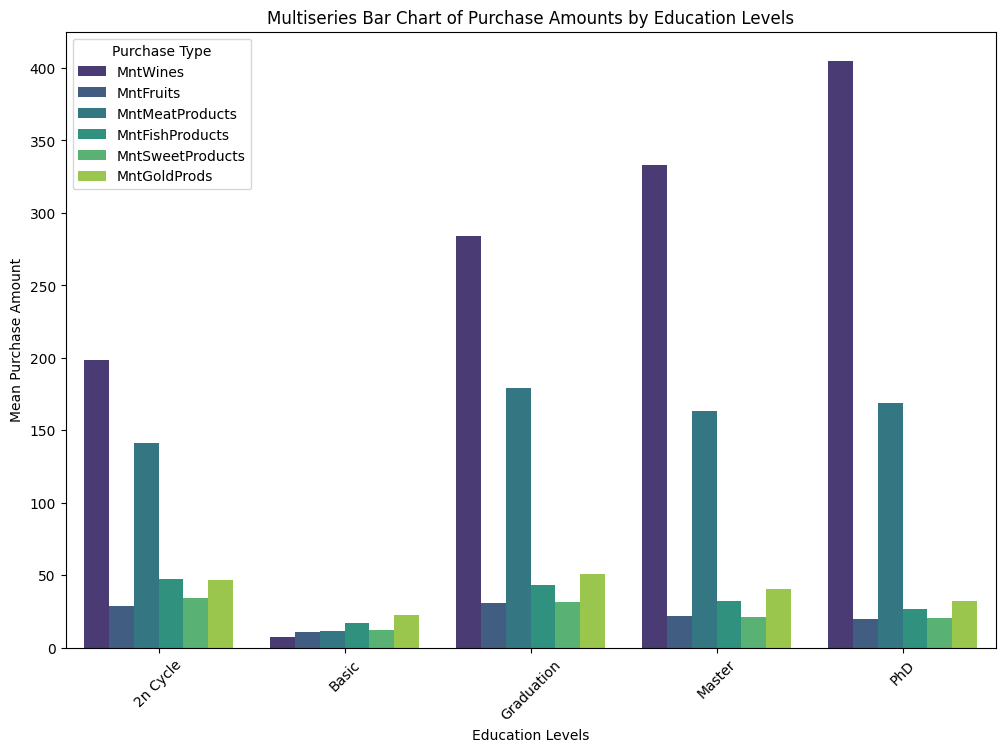

In [ ]:
# The relationship between Education Levels and various purchase categories
# Create a new DataFrame with columns for Education and the purchase variables
purchase_df = df[['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Group the data by Education Levels and calculate the mean purchases for each group
purchase_grouped = purchase_df.groupby('Education').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Education', var_name='PurchaseAmountType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Education', y='mean', hue='PurchaseAmountType', palette='viridis')

# Add labels and title
plt.xlabel('Education Levels')
plt.ylabel('Mean Purchase Amount')
plt.title('Multiseries Bar Chart of Purchase Amounts by Education Levels')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The above bar chart shows that in all education categories the amount spent on wines is the largest category. Also it shows that customers with Ph.D. have the largest total spending.

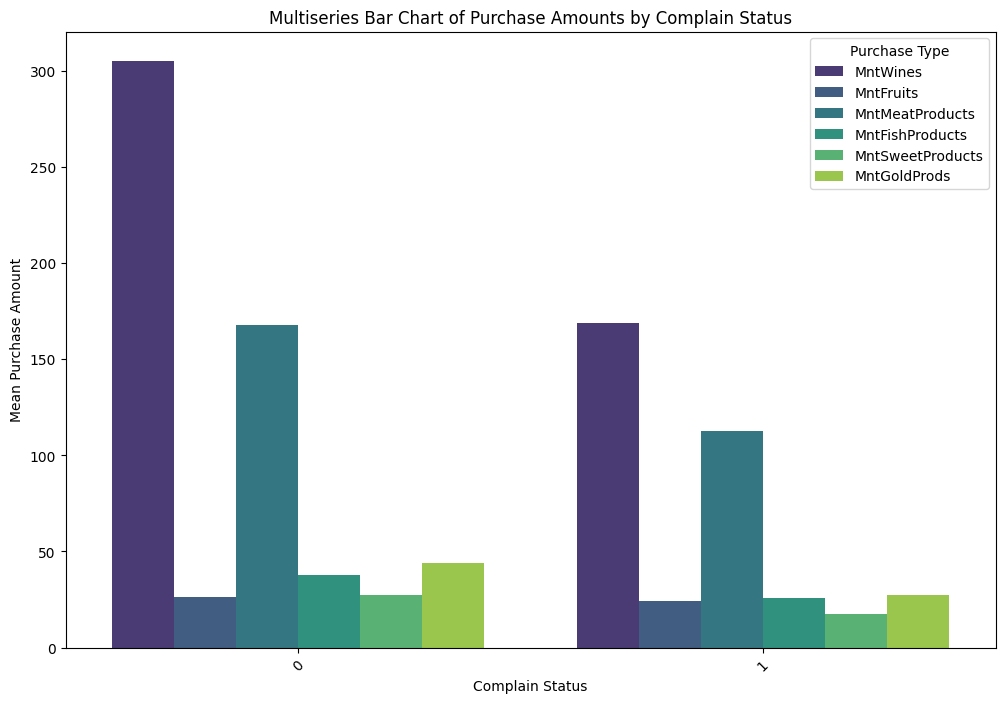

In [ ]:
# The relationship between Complain Status and various amounts of purchase categories
# Create a new DataFrame with columns for Complain and the purchase variables
purchase_df = df[['Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Group the data by Complain Status and calculate the mean purchases for each group
purchase_grouped = purchase_df.groupby('Complain').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Complain', var_name='PurchaseAmountType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Complain', y='mean', hue='PurchaseAmountType', palette='viridis')

# Add labels and title
plt.xlabel('Complain Status')
plt.ylabel('Mean Purchase Amount')
plt.title('Multiseries Bar Chart of Purchase Amounts by Complain Status')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

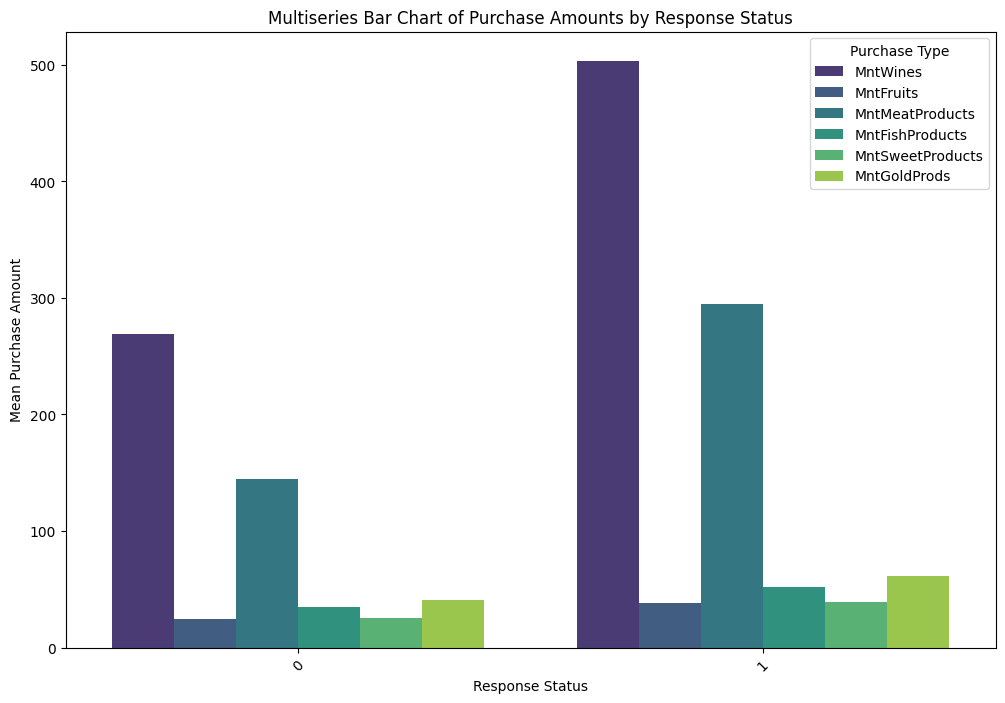

In [ ]:
# The relationship between Response Status and various amounts of purchase categories
# Create a new DataFrame with columns for Response and the purchase variables
purchase_df = df[['Response', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Group the data by Complain Status and calculate the mean purchases for each group
purchase_grouped = purchase_df.groupby('Response').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Response', var_name='PurchaseAmountType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Response', y='mean', hue='PurchaseAmountType', palette='viridis')

# Add labels and title
plt.xlabel('Response Status')
plt.ylabel('Mean Purchase Amount')
plt.title('Multiseries Bar Chart of Purchase Amounts by Response Status')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The above bar chart shows that customers that respond to campaign have larger total amount spent than those that dont respond. Also for both groups the amount spent on wines is the largest spending category.

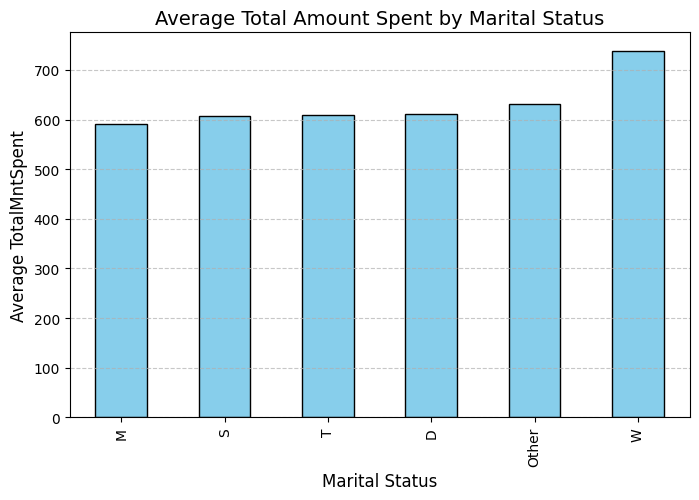

In [ ]:
# The Relationship between Total Amount Spent and Marital Status
# Group by Marital_Status and calculate the mean of TotalMntSpent
marital_spending = df.groupby('Marital_Status')['TotalMntSpent'].mean().sort_values()
# Bar plot for average Total Amount Spent
plt.figure(figsize=(8, 5))
marital_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Amount Spent by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Average TotalMntSpent', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Widows have the largest total amount spent, while maried customers have the lowest.

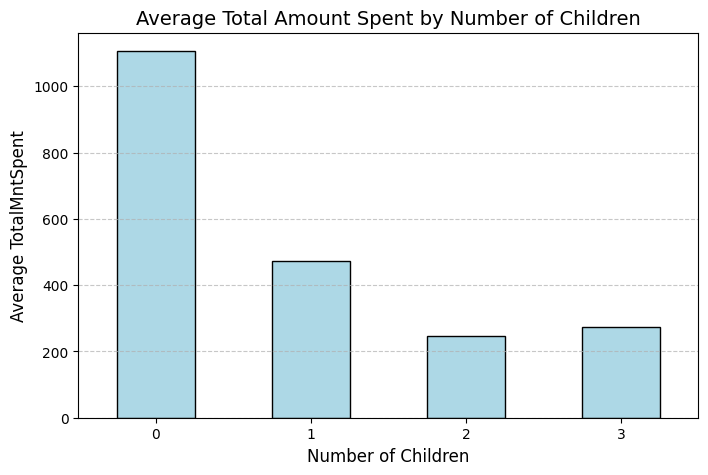

In [ ]:
# The Relationship between Total Amount Spent and the Number of Children
avg_spending = df.groupby('Children')['TotalMntSpent'].mean().sort_index()

plt.figure(figsize=(8, 5))
avg_spending.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average Total Amount Spent by Number of Children', fontsize=14)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Average TotalMntSpent', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Customers with no childreen has the largest total amount spent, while those with two children has the least.

<ipython-input-68-7c5e668c2e99>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recency_Binned', data=df, palette='Set2')


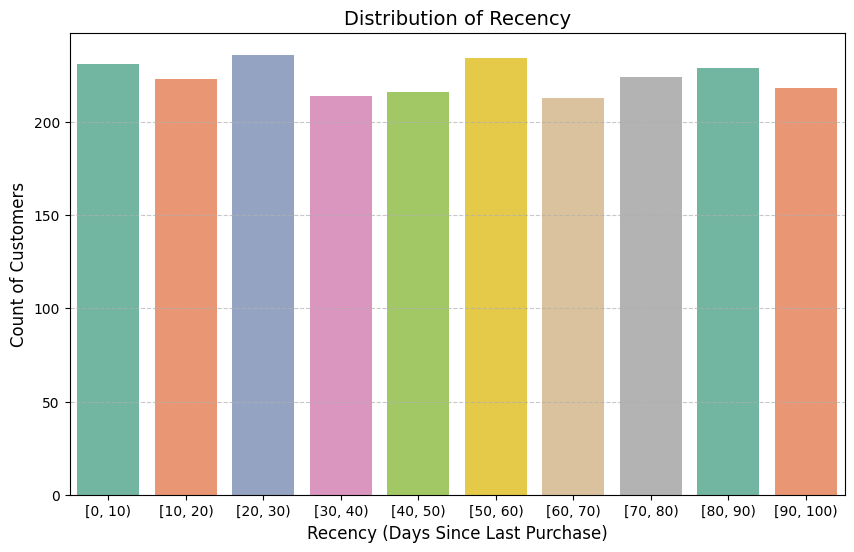

In [ ]:
# Distribution of Recency
# Binning Recency into 10-day intervals
df['Recency_Binned'] = pd.cut(df['Recency'], bins=range(0, df['Recency'].max() + 10, 10), right=False)
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Recency_Binned', data=df, palette='Set2')
plt.title('Distribution of Recency', fontsize=14)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


There is no pattern in the relationship between recency and the number of customers.

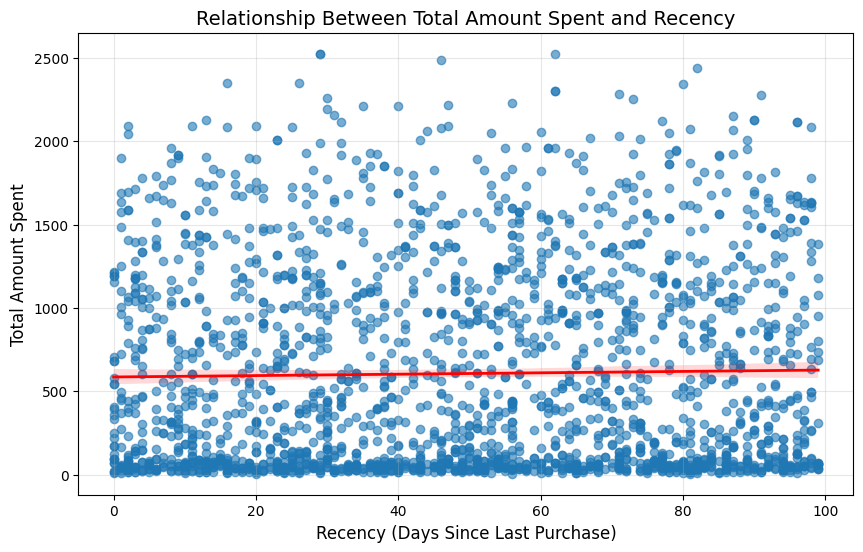

In [ ]:
# The Relationship between Recency and Total Amount Spent
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Recency', y='TotalMntSpent', data=df, scatter_kws={'alpha':0.6}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Relationship Between Total Amount Spent and Recency', fontsize=14)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

The scatter plot shows that there is no relationship between recency and total amount spent by customers.

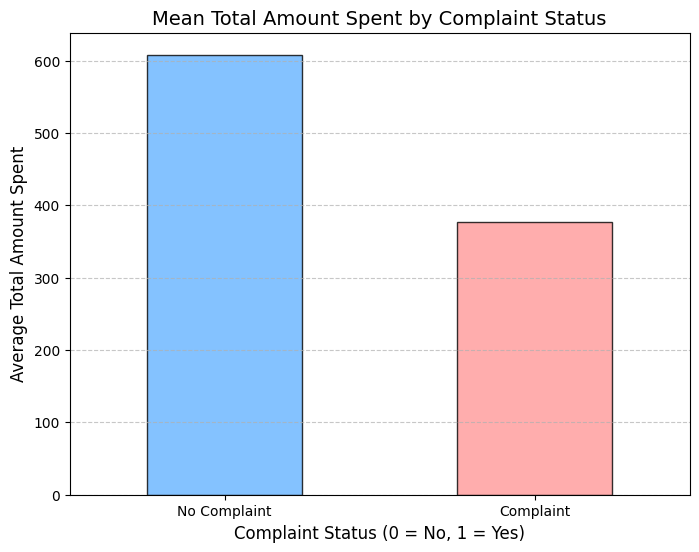

In [ ]:
# The Relationship between Customer Complaints and  Total Amount Spent
# Calculate mean number of purchases for customers with and without complaints
mean_purchases_by_complaint = df.groupby('Complain')['TotalMntSpent'].mean()
# Create a bar plot
plt.figure(figsize=(8, 6))
mean_purchases_by_complaint.plot(kind='bar', color=['#66b3ff', '#ff9999'], alpha=0.8, edgecolor='black')
plt.title('Mean Total Amount Spent by Complaint Status', fontsize=14)
plt.xlabel('Complaint Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Total Amount Spent', fontsize=12)
plt.xticks([0, 1], labels=['No Complaint', 'Complaint'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above bar chart shows that customers without complaint have greater total amount spent than that for customers with complaint.

Education
Basic          81.796296
2n Cycle      496.527094
Master        611.781081
Graduation    619.898846
PhD           673.435950
Name: TotalMntSpent, dtype: float64


<ipython-input-74-731b2da39747>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_spending.index, y=education_spending.values, palette='viridis')


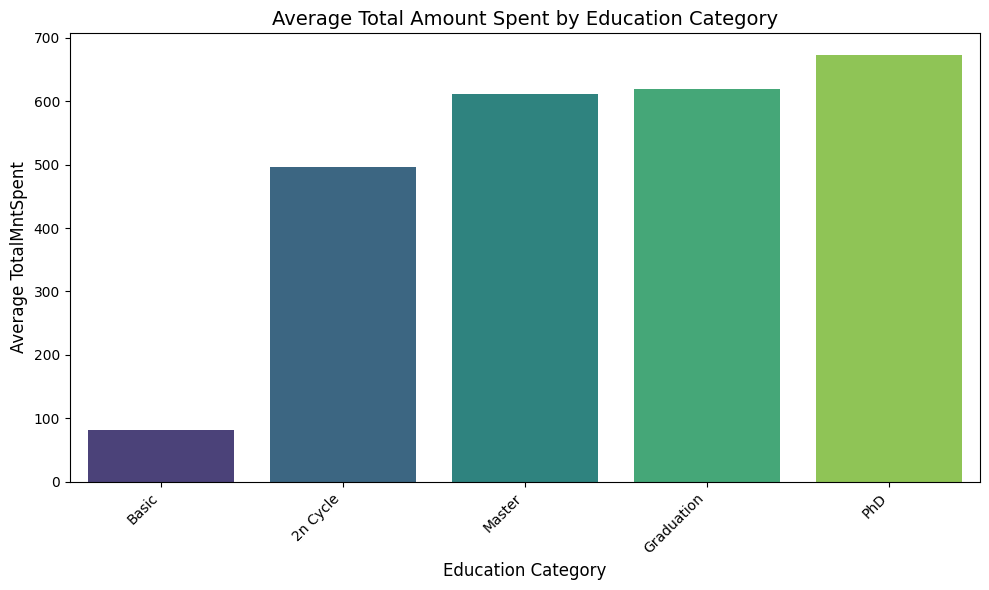

In [ ]:
# The Relationship Between Education Categories and Total Amount Spent
# Group by 'Education' and calculate the mean of 'TotalMntSpent'
education_spending = df.groupby('Education')['TotalMntSpent'].mean().sort_values()
print(education_spending)
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.barplot(x=education_spending.index, y=education_spending.values, palette='viridis')
plt.title('Average Total Amount Spent by Education Category', fontsize=14)
plt.xlabel('Education Category', fontsize=12)
plt.ylabel('Average TotalMntSpent', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above bar chart shows that customers with Ph.D. have the largest total amount spent among the education catogories.

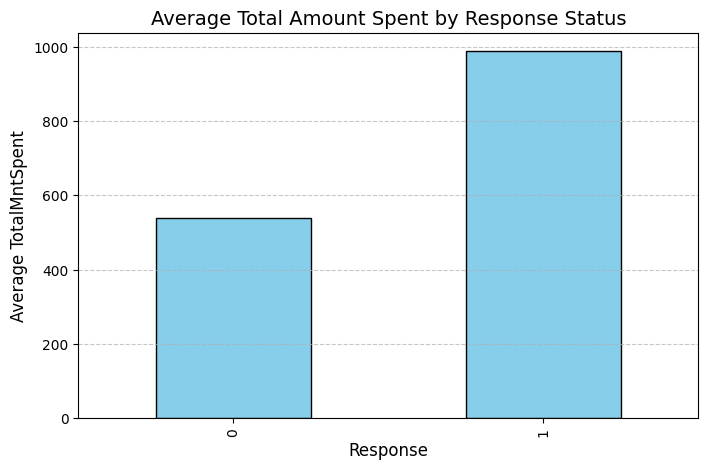

In [ ]:
# The Relationship between Total Amount Spent and Response
# Group by Marital_Status and calculate the mean of TotalMntSpent
marital_spending = df.groupby('Response')['TotalMntSpent'].mean().sort_values()
# Bar plot for average Total Amount Spent
plt.figure(figsize=(8, 5))
marital_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Total Amount Spent by Response Status', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Average TotalMntSpent', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Customers who respond to campaign has higher total amount spent than those that dont respond.

                            OLS Regression Results                            
Dep. Variable:          TotalMntSpent   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     4505.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        01:19:43   Log-Likelihood:                -16266.
No. Observations:                2238   AIC:                         3.254e+04
Df Residuals:                    2236   BIC:                         3.255e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -630.2050     19.824    -31.789      0.0

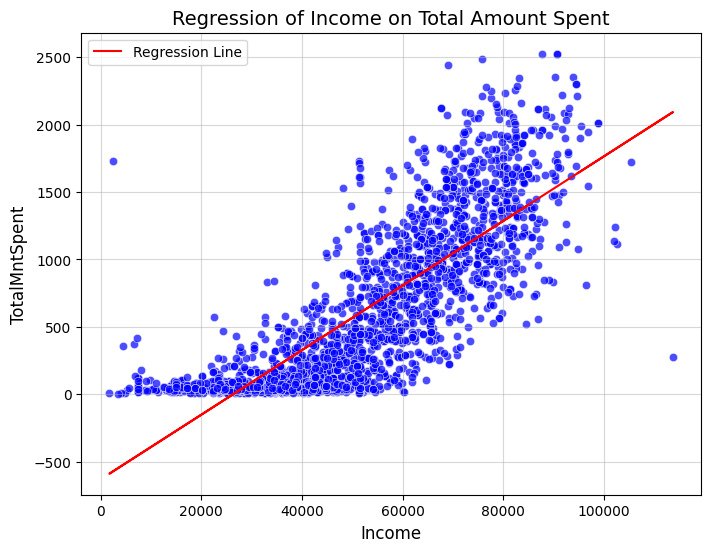

In [ ]:
# The Relationship between Income and Total Amount Spent
import statsmodels.api as sm
X = df['Income']
y = df['TotalMntSpent']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Income'], y=df['TotalMntSpent'], color='blue', alpha=0.7)
plt.plot(df['Income'], model.predict(X), color='red', label='Regression Line')
plt.title('Regression of Income on Total Amount Spent', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('TotalMntSpent', fontsize=12)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

The above univariate regression shows that there is a strong positive linear relationship between income and total amount spent. That is total amount spent increases as income increases.

In [ ]:
# Multivariate Regression of TotalMntSpent on Income, Children, Marital_Status, Education, Recency, Reponse, Complain
import statsmodels.formula.api as smf
formula = 'TotalMntSpent ~ Income + Children + C(Marital_Status) +C(Education) + Recency + Response + Complain'
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          TotalMntSpent   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     438.6
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        02:41:16   Log-Likelihood:                -16018.
No. Observations:                2238   AIC:                         3.207e+04
Df Residuals:                    2223   BIC:                         3.215e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The above multivariate regression shows that there is a positive relationship between basic education and total amount purchased. Also there are positive and significant relationships between income, recency, campaign response and total amount purchased. However, there is a negative and significant relationship between the number of children and total amount purchased. Moreover, there is not significant relationship between customer complaints and total amount purchased suggesting that inclusion of other variables subsumes this relationship documented in the univariate analysis above. Marital status also has no significant effect on total amount spent. This is in contrast to larger value of total amount spent for widows documented above in univariate analysis. These results suggest that inclusion of all variables together in the multivariate regression subsumes the relationship between widows and total amount spent. Finally, the Adjusted R-squared increases to 0.733 larger than 0.668 that in univariate regression with only income suggesting that inclusion of all variables in multivariate regression increases explanatory power of our estimation.

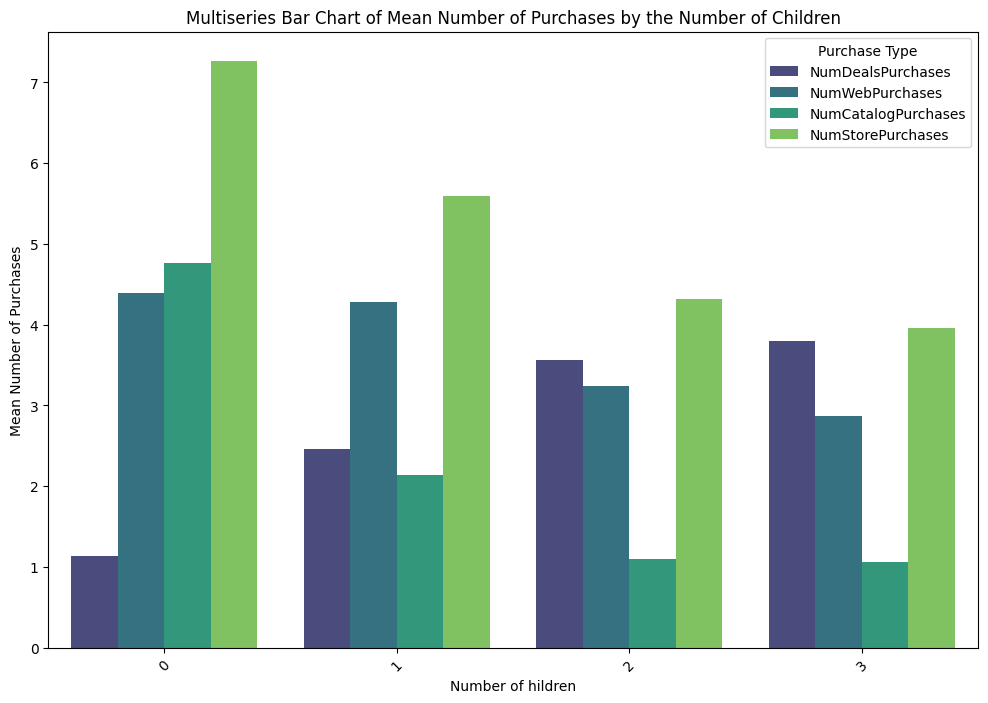

In [ ]:
# The relationship between the number of children and various number of purchase categories
# Create a new DataFrame with columns for Children and the purchase variables
purchase_df = df[['Children', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Group the data by the number of Children and calculate the average purchases for each group
purchase_grouped = purchase_df.groupby('Children').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Children', var_name='PurchaseType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Children', y='mean', hue='PurchaseType', palette='viridis')

# Add labels and title
plt.xlabel('Number of hildren')
plt.ylabel('Mean Number of Purchases')
plt.title('Multiseries Bar Chart of Mean Number of Purchases by the Number of Children')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The number of store purchases is the largest for all children categories. Customers with no children have the largest number of purchases.

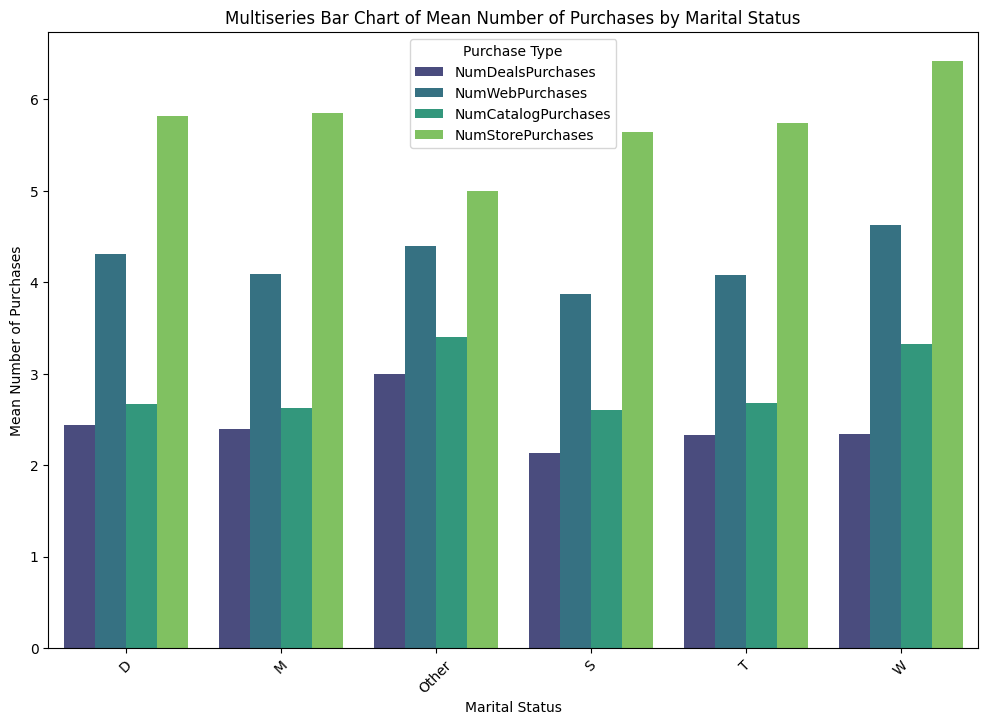

In [ ]:
# The relationship between Marital Status and various number of purchase categories
# Create a new DataFrame with columns for education and the purchase variables
purchase_df = df[['Marital_Status', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Group the data by Marital_Status and calculate average purchases for each group
purchase_grouped = purchase_df.groupby('Marital_Status').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Marital_Status', var_name='PurchaseType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Marital_Status', y='mean', hue='PurchaseType', palette='viridis')

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('Mean Number of Purchases')
plt.title('Multiseries Bar Chart of Mean Number of Purchases by Marital Status')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The number of store purchases are largest for all marital status categories. Widows have the largest number of purchases among marital status categories.

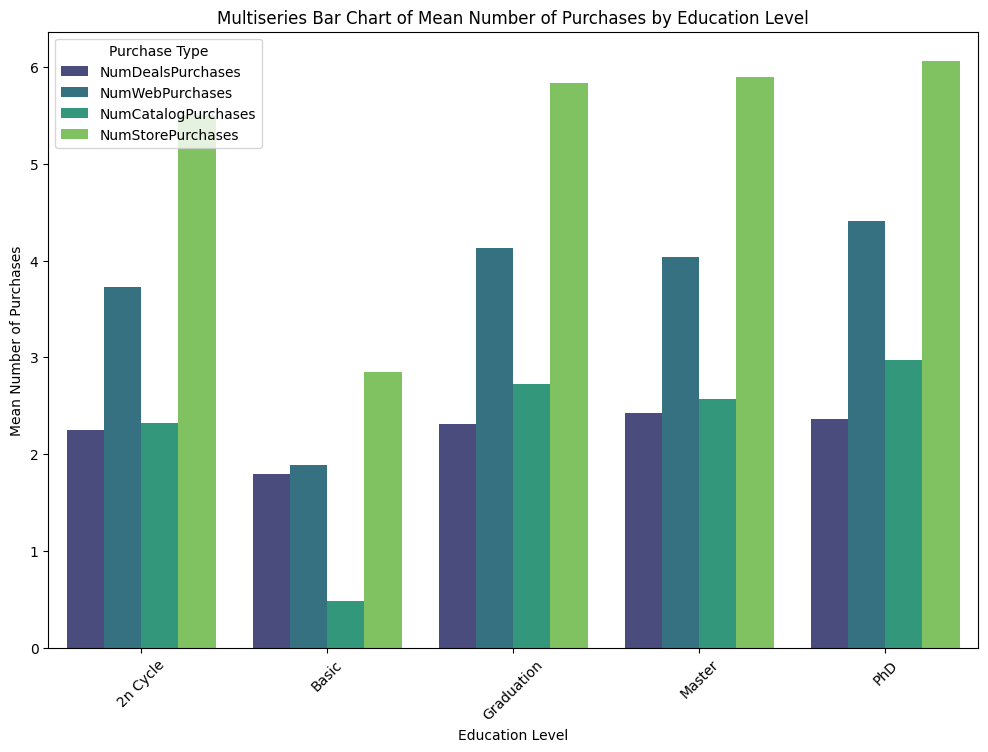

In [ ]:
# The relationship between Education and various number of purchase categories
# Create a new DataFrame with columns for education and the purchase variables
purchase_df = df[['Education', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Group the data by education categories and calculate the average number of purchases for each group
purchase_grouped = purchase_df.groupby('Education').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Education', var_name='PurchaseType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Education', y='mean', hue='PurchaseType', palette='viridis')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Mean Number of Purchases')
plt.title('Multiseries Bar Chart of Mean Number of Purchases by Education Level')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The number of store purchases is the largest for all education categories. Customers with Ph.D. have the largest number of purchases among education categories.

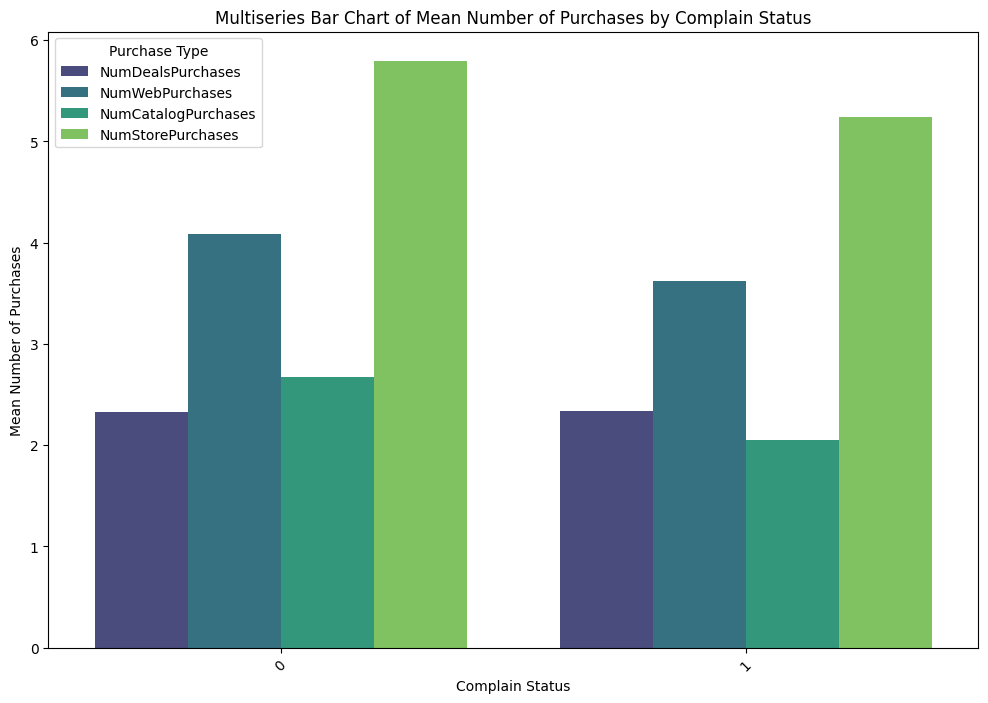

In [ ]:
# The relationship between Complaint Status and various number of purchase categories
# Create a new DataFrame with columns for education and the purchase variables
purchase_df = df[['Complain', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Group the data by Complain Status and calculate the average purchases for each Complain Status
purchase_grouped = purchase_df.groupby('Complain').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Complain', var_name='PurchaseType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Complain', y='mean', hue='PurchaseType', palette='viridis')

# Add labels and title
plt.xlabel('Complain Status')
plt.ylabel('Mean Number of Purchases')
plt.title('Multiseries Bar Chart of Mean Number of Purchases by Complain Status')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The number of store purchases is the largest for both customers with and without complaint. Customers without complaint have greater number of purchases than those with complaint.

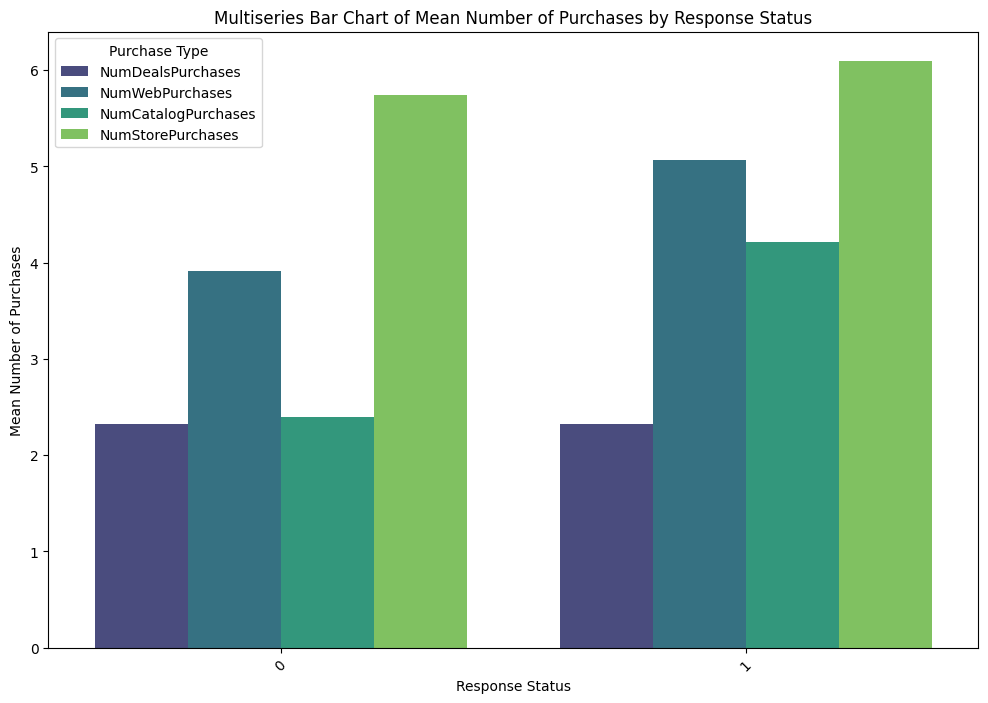

In [ ]:
# The relationship between Response Status and various number of purchase categories
# Create a new DataFrame with columns for Response and the purchase variables
purchase_df = df[['Response', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

# Group the data by Response Status and calculate the average purchases for each Complain Status
purchase_grouped = purchase_df.groupby('Response').mean().reset_index()

# Melt the DataFrame to convert it to long format for plotting
purchase_melted = purchase_grouped.melt(id_vars='Response', var_name='PurchaseType', value_name='mean')

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=purchase_melted, x='Response', y='mean', hue='PurchaseType', palette='viridis')

# Add labels and title
plt.xlabel('Response Status')
plt.ylabel('Mean Number of Purchases')
plt.title('Multiseries Bar Chart of Mean Number of Purchases by Response Status')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Purchase Type')
plt.show()

The above bar chart shows that customers that respond to campain has greater number of purchases than those that dont respond. Number of store purchases is the largest purchase category for both groups.

<ipython-input-55-0e0ef272b01e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchases.index, y=avg_purchases.values, palette='Set3')


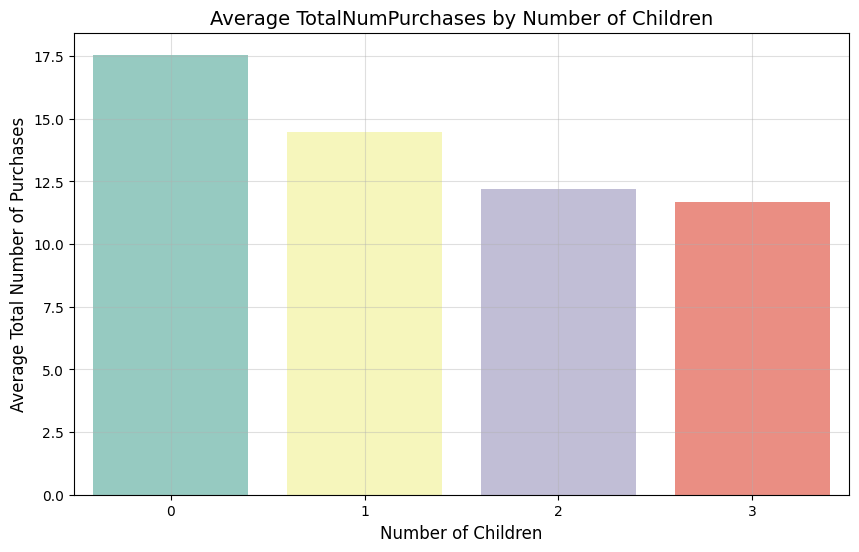

In [ ]:
# The Relation between Total Number of Purchases and the Number of Children
# Bar Plot (Average TotalNumPurchases per Number of Children)
plt.figure(figsize=(10, 6))
avg_purchases = df.groupby('Children')['TotalNumPurchases'].mean()
sns.barplot(x=avg_purchases.index, y=avg_purchases.values, palette='Set3')
plt.title('Average TotalNumPurchases by Number of Children', fontsize=14)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Average Total Number of Purchases', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

The above bar chart shows that customers with no children has the largest number of total purchases while those that with three children has the smallest total purchases.

<ipython-input-57-87932fa3aee2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchases.index, y=avg_purchases.values, palette='Set3')


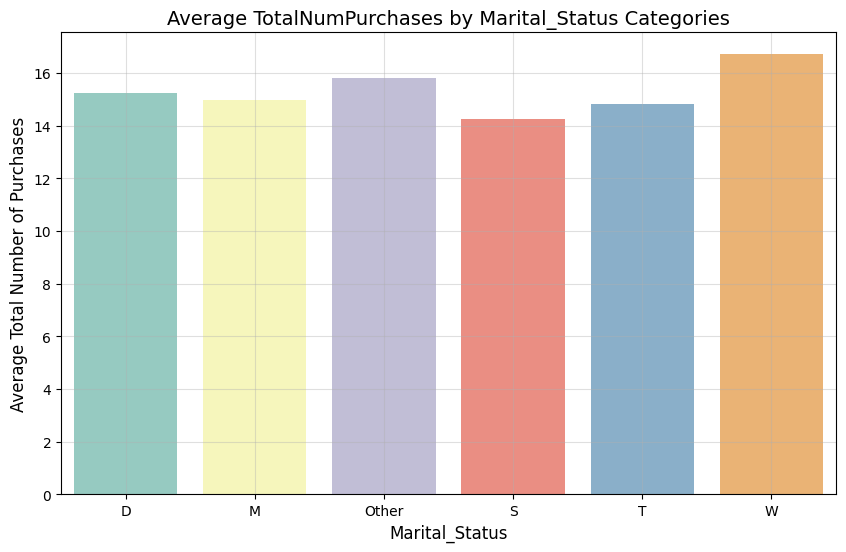

In [ ]:
# The Relation between Total Number of Purchases and the Marital_Status
# Bar Plot (Average TotalNumPurchases for Marital_Status Categories)
plt.figure(figsize=(10, 6))
avg_purchases = df.groupby('Marital_Status')['TotalNumPurchases'].mean()
sns.barplot(x=avg_purchases.index, y=avg_purchases.values, palette='Set3')
plt.title('Average TotalNumPurchases by Marital_Status Categories', fontsize=14)
plt.xlabel('Marital_Status', fontsize=12)
plt.ylabel('Average Total Number of Purchases', fontsize=12)
plt.grid(alpha=0.4)
plt.show()

The above bar chart shows that widows have the largest number of total purchases while singles have the smallest total number of purchases.

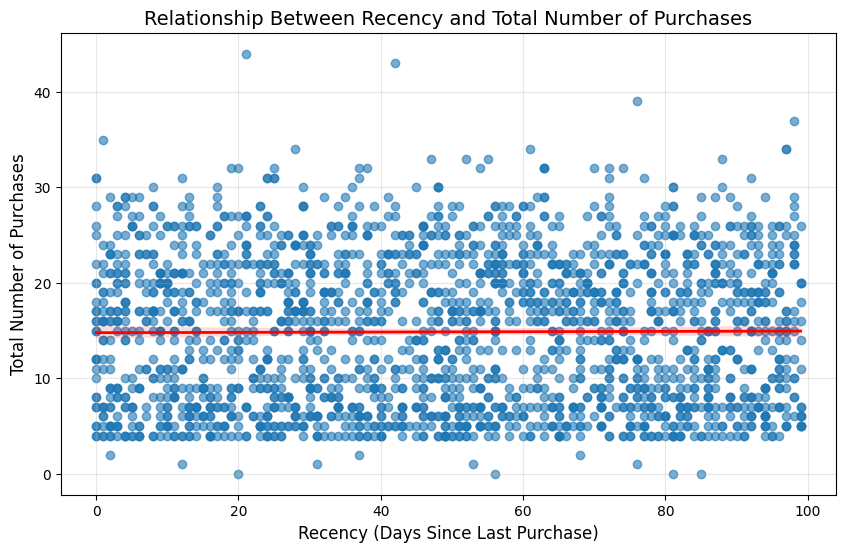

In [ ]:
# The Relationship between Recency and Total Number of Purchases
plt.figure(figsize=(10, 6))
sns.regplot(x='Recency', y='TotalNumPurchases', data=df, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Relationship Between Recency and Total Number of Purchases', fontsize=14)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12)
plt.ylabel('Total Number of Purchases', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

The above scatter plot shows that there is no visible relationship between recency and total number of purchases.

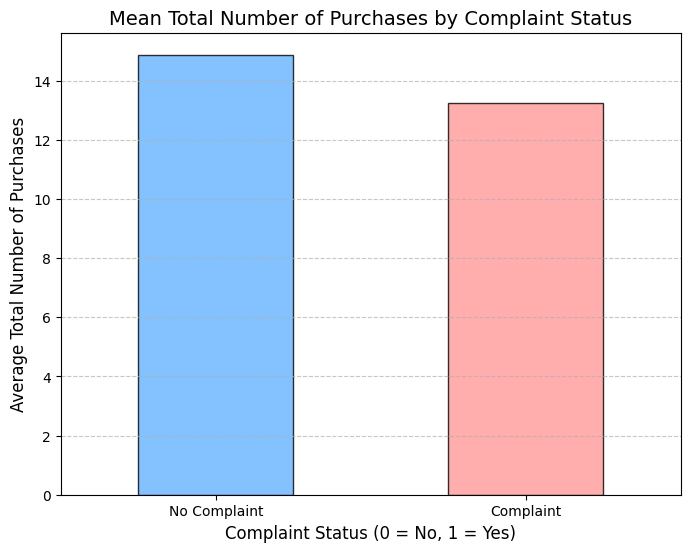

In [ ]:
# The Relationship between Customer Complaints and Total Number of Purchases
# Calculate mean number of purchases for customers with and without complaints
mean_purchases_by_complaint = df.groupby('Complain')['TotalNumPurchases'].mean()
# Create a bar plot
plt.figure(figsize=(8, 6))
mean_purchases_by_complaint.plot(kind='bar', color=['#66b3ff', '#ff9999'], alpha=0.8, edgecolor='black')
plt.title('Mean Total Number of Purchases by Complaint Status', fontsize=14)
plt.xlabel('Complaint Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Total Number of Purchases', fontsize=12)
plt.xticks([0, 1], labels=['No Complaint', 'Complaint'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above bar chart shows that customers who did not make any complaint have greater total number of purchases than those with complaint.

Education
Basic          7.018519
2n Cycle      13.802956
Master        14.927027
Graduation    14.990240
PhD           15.816116
Name: TotalNumPurchases, dtype: float64


<ipython-input-76-23f54f5462dd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_purchases.index, y=education_purchases.values, palette='viridis')


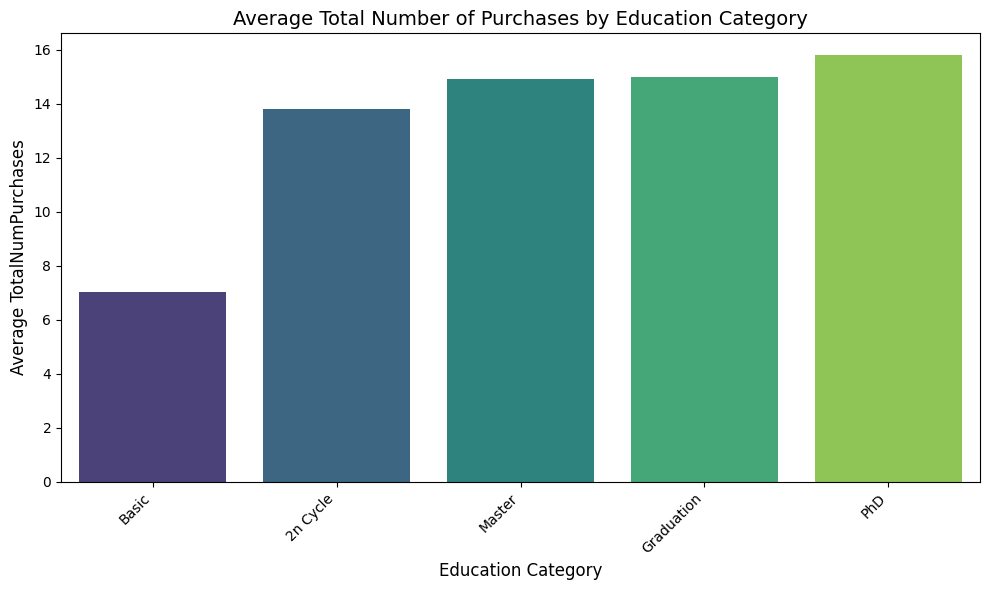

In [ ]:
# The Relationship between Edcuation Categories and Total Number of Purchases
# Group by 'Education' and calculate the mean of 'TotalNumPurchases'
education_purchases = df.groupby('Education')['TotalNumPurchases'].mean().sort_values()
print(education_purchases)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=education_purchases.index, y=education_purchases.values, palette='viridis')
plt.title('Average Total Number of Purchases by Education Category', fontsize=14)
plt.xlabel('Education Category', fontsize=12)
plt.ylabel('Average TotalNumPurchases', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The above bar chart shows that customers with PhD. have the largest total number of purchases while those with basid education has the smallest.

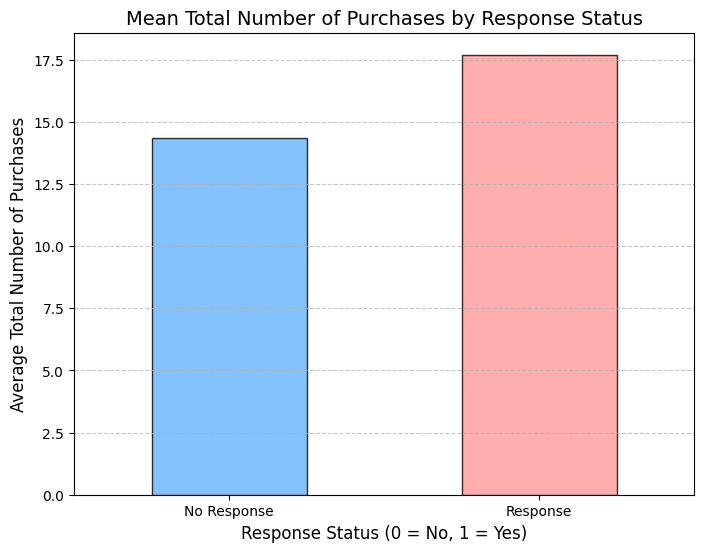

In [ ]:
# The Relationship between Customer Response and Total Number of Purchases
# Calculate mean number of purchases for customers with Response
mean_purchases_by_complaint = df.groupby('Response')['TotalNumPurchases'].mean()
# Create a bar plot
plt.figure(figsize=(8, 6))
mean_purchases_by_complaint.plot(kind='bar', color=['#66b3ff', '#ff9999'], alpha=0.8, edgecolor='black')
plt.title('Mean Total Number of Purchases by Response Status', fontsize=14)
plt.xlabel('Response Status (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Average Total Number of Purchases', fontsize=12)
plt.xticks([0, 1], labels=['No Response', 'Response'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above bar chart shows that customers with campaign response have greater total number of purchases than those without response.

                            OLS Regression Results                            
Dep. Variable:      TotalNumPurchases   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     2035.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          1.48e-316
Time:                        02:17:13   Log-Likelihood:                -7013.2
No. Observations:                2238   AIC:                         1.403e+04
Df Residuals:                    2236   BIC:                         1.404e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5541      0.317      4.895      0.0

<ipython-input-71-c9219530215d>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]  # Get intercept from params
<ipython-input-71-c9219530215d>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coefficient = model.params[1]  # Get coefficient from params


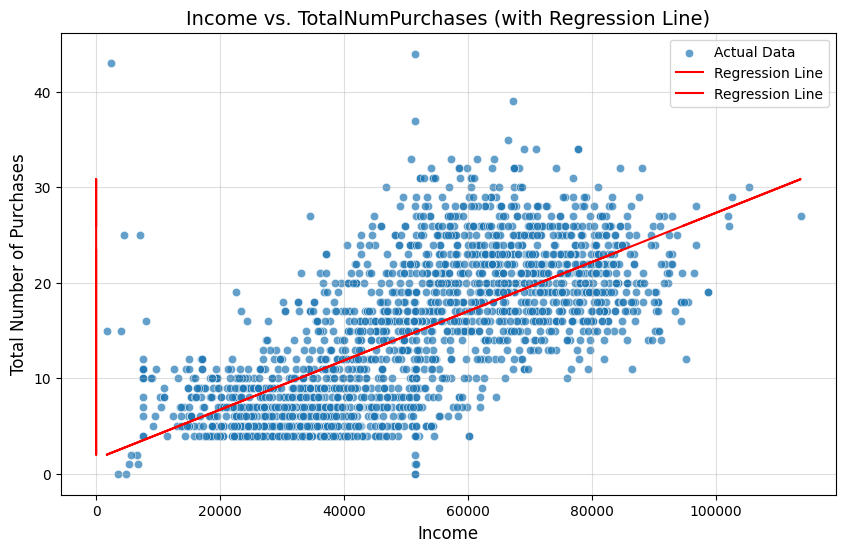

In [ ]:
# The Relationship between Income and Total Number of Purchases
X = df['Income']
y = df['TotalNumPurchases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())
intercept = model.params[0]
coefficient = model.params[1]
print(f"Linear Regression Model: TotalNumPurchases = {intercept:.2f} + {coefficient:.2f} * Income")
# Predict and visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalNumPurchases', data=df, alpha=0.7, label="Actual Data")
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Income vs. TotalNumPurchases (with Regression Line)', fontsize=14)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Total Number of Purchases', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


The above scatter plot shows that there is a strong positive linear relationship between income and total amount purchased.

In [ ]:
# Multivariate Regression of TotalNumPurchases on Income, Children, Marital_Status, Education, Recency, Reponse, Complain
import statsmodels.formula.api as smf
formula = 'TotalNumPurchases ~ Income + Children + C(Marital_Status) + C(Education) + Recency + Response + Complain'
model = smf.ols(formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalNumPurchases   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     146.2
Date:                Wed, 30 Apr 2025   Prob (F-statistic):          2.46e-302
Time:                        02:46:09   Log-Likelihood:                -7006.9
No. Observations:                2238   AIC:                         1.404e+04
Df Residuals:                    2223   BIC:                         1.413e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The above multivariate regression shows that there is a positive relationship between income, campaign response and total number of purchases. These results show that the inclusion of other variables in multivariate regression does not subsume the positive relationships documented in the univariate analysis. However, the relationships between the number of children, recency, education, marital status and total number of purchases are all insignificant. These results suggest that the positive relationships documented in univariate analysis are completely subsumed in multivariate analysis with unclusion of other variables. Moreover, the negative relationship between complaint status and total number of purchases in univariate analysis documented above is insignificant in multivariate regression suggesting that the inclusion of other variables subsumes this negative relatiosnhip. FInally, the adusted R-squared in 0.476 in multivariate regression, the same as that in univariate regression with only income suggesting that inclusion of other variables in the multivariate regression does not increase explanatory power of our model. This finding suggests that income has the strongest variable in explaining variation in total number of purchases among all the variables investigated in mutivariate analysis.